# Cat-Dog Image Dataset Exploration

<p><b>Status: <span style=color:green;>Completed</span></b></p>

##### LOCATE  FILE NAMES
Read the name of the files in the data folder and store them on a list

In [1]:
import os

data_dir = '../../data/'
class_list = os.listdir(data_dir) # get class names based on folder names

filename_list = []

# make a list of the images' file names, 'cats' and 'dogs' folders
for _class in class_list:
    filename_list_class = os.listdir(data_dir + _class)
    filename_list_class = [(_class + '/' + fname) for fname in filename_list_class if fname.endswith('.jpg')]
    filename_list += filename_list_class
    
print('Total number of files : ', len(filename_list))
filename_list[:10]

Total number of files :  25000


['Cat/0.jpg',
 'Cat/1.jpg',
 'Cat/10.jpg',
 'Cat/100.jpg',
 'Cat/1000.jpg',
 'Cat/10000.jpg',
 'Cat/10001.jpg',
 'Cat/10002.jpg',
 'Cat/10003.jpg',
 'Cat/10004.jpg']

##### EXTRACT IMAGE INFORMATION


In [2]:
import pandas as pd
import numpy as np
import cv2

# this will try to deploy a progress bar
try:
    from tqdm.notebook import tqdm
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x

# iniciate dataset variable
data = pd.DataFrame()

# make a list with the name of invalid files
fail_dir_list = []
fail_idx_list = []

for f in tqdm(range(len(filename_list))):
    try:
        # read every image
        img_path = data_dir + filename_list[f]
        img = np.array(cv2.imread(img_path))
        
        # split image directory name
        fname_split = filename_list[f].split("/")  # =[Cat, 10.jpg] example
        
        # extract image information
        data.loc[f, 'classes'] = fname_split[0]
        data.loc[f, 'number'] = fname_split[1].split(".")[0]
        data.loc[f, 'format'] = fname_split[1].split(".")[1]
        data.loc[f, 'size' ] = img.size
        data.loc[f, 'height'] = img.shape[0]
        data.loc[f, 'width'] = img.shape[1]
        data.loc[f, 'channel'] = img.shape[2]
        data.loc[f, 'dtype'] = img.dtype
        data.loc[f, 'dir'] = img_path
    
    except Exception as e:
        # log names and indices of files with errors
        fail_dir_list.append(filename_list[f])
        fail_idx_list.append(f)
        pass

print('{} invalid file(s) were found\n'.format(len(fail_dir_list)))
print('Printing the resulting dataset :\n')

data.head()

  0%|          | 0/25000 [00:00<?, ?it/s]

54 invalid file(s) were found

Printing the resulting dataset :



,classes,number,format,size,height,width,channel,dtype,dir
0,Cat,0,jpg,562500.0,375.0,500.0,3.0,uint8,../../data/Cat/0.jpg
1,Cat,1,jpg,252900.0,281.0,300.0,3.0,uint8,../../data/Cat/1.jpg
2,Cat,10,jpg,733500.0,500.0,489.0,3.0,uint8,../../data/Cat/10.jpg
3,Cat,100,jpg,604500.0,500.0,403.0,3.0,uint8,../../data/Cat/100.jpg
4,Cat,1000,jpg,67500.0,150.0,150.0,3.0,uint8,../../data/Cat/1000.jpg


##### DROP THE INVALID FILES
The following block will delete those rows with invalid or incomplete data. Some images were were not read probably because they were corrupted or maybe opencv just didn't know how to read them.

In [3]:
# delete invalid rows and reset index
data = data.drop(fail_idx_list)  # based on the index
data.reset_index(drop=True)      # rearrange the index

print('Total files removed : {}'.format(len(fail_idx_list)))
print('Dataset new size is : {}'.format(len(data)))

Total files removed : 54
Dataset new size is : 24946


##### VISUALIZE IMAGE SIZE
Sort dataframe by size in ascendent order to confirm there is no image file size zero

In [4]:
data.sort_values(by=['size']).head()

,classes,number,format,size,height,width,channel,dtype,dir
7694,Cat,5673,jpg,48.0,4.0,4.0,3.0,uint8,../../data/Cat/5673.jpg
8505,Cat,6402,jpg,5940.0,33.0,60.0,3.0,uint8,../../data/Cat/6402.jpg
7540,Cat,5534,jpg,6480.0,36.0,60.0,3.0,uint8,../../data/Cat/5534.jpg
24674,Dog,9705,jpg,7020.0,39.0,60.0,3.0,uint8,../../data/Dog/9705.jpg
6748,Cat,4821,jpg,7200.0,40.0,60.0,3.0,uint8,../../data/Cat/4821.jpg


##### DATA OVERVIEW

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24946 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   classes  24946 non-null  object 
 1   number   24946 non-null  object 
 2   format   24946 non-null  object 
 3   size     24946 non-null  float64
 4   height   24946 non-null  float64
 5   width    24946 non-null  float64
 6   channel  24946 non-null  float64
 7   dtype    24946 non-null  object 
 8   dir      24946 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.9+ MB


##### VISUALIZE DISTRIBUTION OF CLASSES

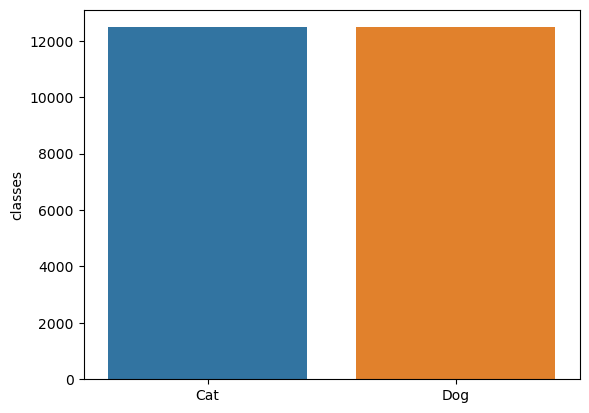

In [6]:
import seaborn as sns

sns.barplot(x=data['classes'].unique(), y=data['classes'].value_counts());

##### VISUALIZE DISTRIBUTION OF FILE FORMATS

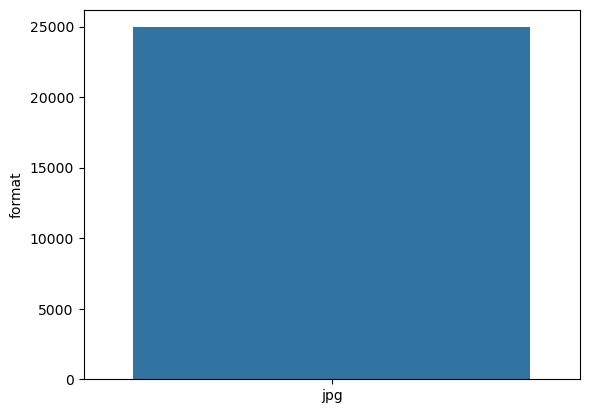

In [7]:
sns.barplot(x=data['format'].unique(), y=data['format'].value_counts());

##### VISUALIZE DISTRIBUTION OF COLOR CHANNELS

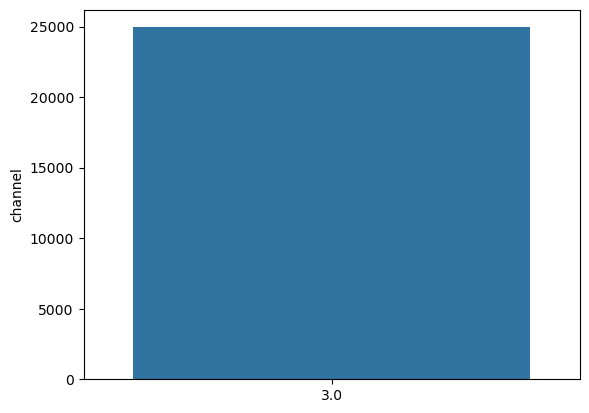

In [8]:
sns.barplot(x=data['channel'].unique(), y=data['channel'].value_counts());

##### VISUALIZE DISTRIBUTION OF IMAGE SHAPES

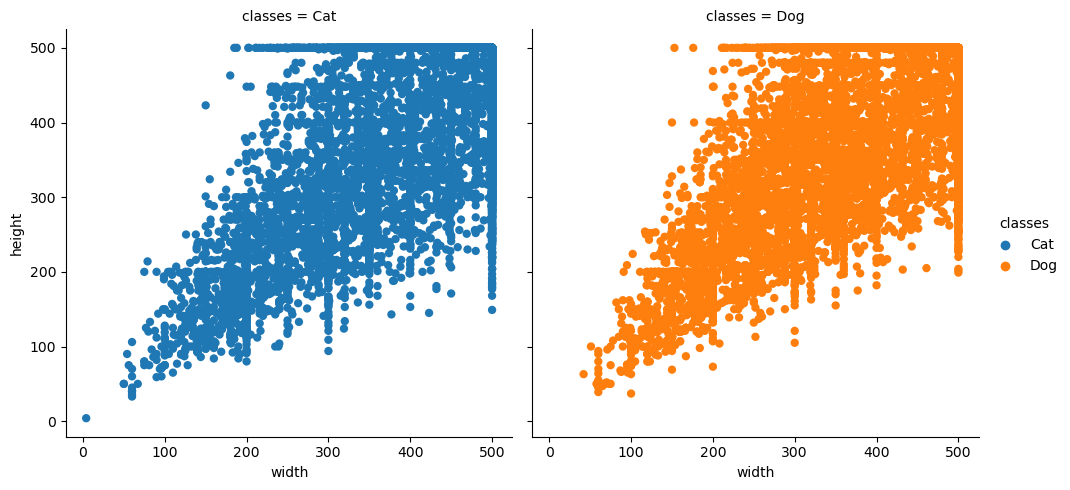

In [9]:
sns.relplot(x='width', y='height', data=data, hue='classes', col='classes', linewidth=0);

##### VISUALIZE DISTRIBUTION OF IMAGE SIZES

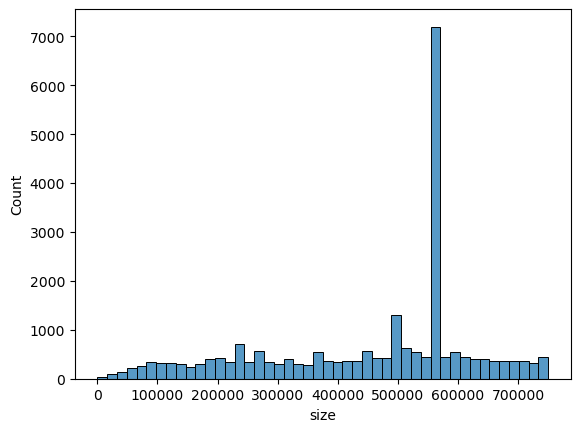

In [10]:
sns.histplot(data['size']);